In [61]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

hello = tf.constant('Bienvenido a , TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Bienvenido a , TensorFlow!'


In [ ]:
import tensorflow as tf
import numpy as np
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

In [50]:
import tensorflow as tf
import numpy as np
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

Tensor("Const_19:0", shape=(), dtype=int32)


In [51]:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

Tensor("Const_20:0", shape=(3,), dtype=float32)


In [52]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

Tensor("Const_21:0", shape=(3, 2), dtype=float16)


VARIABLES EN TENSORFLOW

In [53]:


v = tf.Variable(0.0)
w = v + 1 # w es un tf.Tensor que se computa basado en el valor de v.
           # Cualuier momento en que una variable es usada en una expresion
           # Es convertida automaticamente en un tf.Tensor representando su
           # valor
print(w)

Tensor("add_6:0", shape=(), dtype=float32)


In [54]:
#Para asignar un valor a una variable, se usan los metodos assign, assign_add, y friends en la clase tf.Variable.
#Por ejemplo, asi es como se pueden llamar estos metodos:


v = tf.Variable(0.0)
v.assign_add(1)

<tf.Variable 'AssignAddVariableOp_5' shape=() dtype=float32>

In [55]:
#Tambien se puede leer explicitamente el valor actual de una variable, usando read_value:


v = tf.Variable(0.0)
v.assign_add(7)
v.read_value()  # 1.0

<tf.Tensor 'Identity_3:0' shape=() dtype=float32>

Ejemplo de Gradiente

In [24]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
 
# x y y son placeholders
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
 
# la ecuación que aplicamos es y = b*x*x
b = tf.Variable([0.0], name="b")
ys = tf.multiply(tf.multiply(x, x),b)
 
# control del error
e = tf.square(y - ys)
 
# The Gradient Descent Optimizer el gadiente descendiente optimo
# 1.0 es el  learning_rate. 
train = tf.train.GradientDescentOptimizer(1.0).minimize(e)
 
# creamos una sesión y entrenamos el modelo
model = tf.global_variables_initializer()
 
with tf.Session() as session:
    session.run(model)
    for i in range(50):
        x_value = np.random.rand()
        # Asumimos  b=4, entonces vamos a encontrar b_value = 4 y encontrarlo por descenso de gradiente
        # y = 4*x*x
        y_value = 4.0*x_value*x_value
        session.run(train, feed_dict={x: x_value, y: y_value})
 
    b_value = session.run(b)
    print("Predicted model: b = ", b_value)

Predicted model: b =  [4.0000005]


Gráficas en Tensorflow

In [58]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Crea una variable con un valor inicial de 1
some_var = tf.Variable(1)

# Crea una op para ejecutar inicializadores de variables
init_op = tf.global_variables_initializer()
# Crea una op para reemplazar el valor mantenido por some_var a 3
assign_op = some_var.assign(3)
# Instala dos instancias de una sesión
sess1 = tf.Session()


# Inicializa variables en ambas sesiones
sess1.run(init_op)

print(sess1.run(some_var)) # Salidas 1

# Cambia some_var en sesión1
sess1.run(assign_op)
print(sess1.run(some_var)) # Salidas 3


# Cierra Sesiones
sess1.close()


1
3


PROPAGACIÓN HACIA ATRAS


In [113]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sess = tf.Session()
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))
my_output = tf1.multiply(x_data, A)
loss = tf.square(my_output - y_target)
init = tf.initialize_all_variables()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #'+ str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = '+ str(sess.run(loss, feed_dict={x_data:rand_x, y_target: rand_y})))



Step #25 A = [6.6036973]
Loss = [17.037941]
Step #50 A = [8.820587]
Loss = [0.15502495]
Step #75 A = [9.639409]
Loss = [0.14274076]
Step #100 A = [9.596413]
Loss = [6.3281555]


In [109]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.
normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [118]:
my_output = tf.add(x_data, A)
my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)
init = tf.initialize_all_variables()
sess.run(init)
xentropy=tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output_expanded, labels=tf.to_float(y_target_expanded))
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Instructions for updating:
Use `tf.cast` instead.
Step #200 A = [91.84589]
Loss = [[-835.64185]]
Step #400 A = [181.84528]
Loss = [[-1645.148]]
Step #600 A = [271.8452]
Loss = [[-2453.8025]]
Step #800 A = [361.84766]
Loss = [[-3267.7366]]
Step #1000 A = [451.8501]
Loss = [[-4078.126]]
Step #1200 A = [541.85254]
Loss = [[-4886.0254]]
Step #1400 A = [631.855]
Loss = [[-5696.6943]]


PRECEPTOR CON UNA NEURONA --> OPERACION AND

In [16]:
import tensorflow as tf
print(tf.__version__)
#!pip install --upgrade tensorflow

# Let us initialize our training examples first. 
X1=tf.Variable(initial_value=[0.,1.,0.,1.])
X2=tf.Variable(initial_value=[0.,0.,1.,1.])
Y_AND=tf.Variable(initial_value=[0.,0.,0.,1.])
class Model(object):
 
   def __init__(self):
    self.W1 = tf.Variable(2.)
    self.W2= tf.Variable(2.)
    self.b=tf.Variable(2.)
        
   
   def __call__(self, X1,X2):
    self.K1=self.W1 * X1 + self.W2 * X2 + self.b
    self.Output = tf.keras.activations.sigmoid(self.K1)
    return(self.Output)
    
model=Model()


2.5.0


In [17]:
def compute_cost(target_y, predicted_y):
    c=tf.keras.losses.BinaryCrossentropy()
    return(c(target_y,predicted_y))

In [18]:
def None_to_Zero(v):
    if v==None:
        v=0
    return v

In [19]:
def train(model, X1, X2, Y2, learning_rate):
    with tf.GradientTape() as t:
        current_loss = compute_cost(Y2,model(X1,X2))
    dW1,dW2,db=t.gradient(current_loss,[model.W1,model.W2,model.b])
    dW1=None_to_Zero(dW1)
    db=None_to_Zero(db)
    dW2=None_to_Zero(dW2)
    model.W1.assign_sub(learning_rate * dW1)
    model.b.assign_sub(learning_rate * db)
    model.W2.assign_sub(learning_rate * dW2)

In [20]:
import numpy as np
epochs=range(1000)
learning_rate=0.1
for epoch in epochs:
    train(model, X1, X2,Y_AND, learning_rate)
print(np.round(model(X1, X2).numpy()))

[0. 0. 0. 1.]


REDES NEURONALES MULTICAPA 

In [27]:
# coding=utf-8
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# entrada vector X
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
# salida vector Y
Y = [[0], [1], [1], [0]]
 
# Placeholders para las entradas y salidas
x = tf.placeholder(tf.float32, shape=[4,2])
y = tf.placeholder(tf.float32, shape=[4,1])
 
# W matriz
W1 = tf.Variable([[1.0, 0.0], [1.0, 0.0]], shape=[2,2])
W2 = tf.Variable([[0.0], [1.0]], shape=[2,1])
 
# Biases
B1 = tf.Variable([0.0, 0.0], shape=[2])
B2 = tf.Variable([0.0], shape=1)
 
# capa oculta and capa salida
output =tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(x, W1) + B1), W2) + B2)
 
# error de estimacion
e = tf.reduce_mean(tf.squared_difference(y, output))
train = tf.train.GradientDescentOptimizer(0.1).minimize(e)
 
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
 
for i in range (100001):
    error = sess.run(train, feed_dict={x: X, y: Y})
    if i % 10000 == 0:
        print('\nEpoch: ' + str(i))
        print('\nError: ' + str(sess.run(e, feed_dict={x: X, y: Y})))
        for el in sess.run(output, feed_dict={x: X, y: Y}):
            print('    ',el)
sess.close()
 
print ("Complete")


Epoch: 0

Error: 0.26442587
     [0.62025726]
     [0.6200183]
     [0.6200183]
     [0.6198486]

Epoch: 10000

Error: 0.07002342
     [0.2077933]
     [0.7534745]
     [0.7534745]
     [0.33965564]

Epoch: 20000

Error: 0.0061955405
     [0.07956657]
     [0.9271754]
     [0.9271754]
     [0.08856907]

Epoch: 30000

Error: 0.0028774943
     [0.05516872]
     [0.9504955]
     [0.9504955]
     [0.05970758]

Epoch: 40000

Error: 0.0018379441
     [0.04440123]
     [0.9604852]
     [0.9604852]
     [0.04751286]

Epoch: 50000

Error: 0.0013404149
     [0.03807229]
     [0.96628344]
     [0.96628344]
     [0.04047897]

Epoch: 60000

Error: 0.001051139
     [0.03380311]
     [0.970159]
     [0.970159]
     [0.03579015]

Epoch: 70000

Error: 0.00086272974
     [0.03068176]
     [0.9729731]
     [0.9729731]
     [0.03238276]

Epoch: 80000

Error: 0.00073076086
     [0.02828008]
     [0.9751314]
     [0.9751314]
     [0.02977222]

Epoch: 90000

Error: 0.0006333374
     [0.02635822]
     [0.976

todas las operaciones lógicas 

In [ ]:
import tensorflow as tf
print(tf.__version__)
#!pip install --upgrade tensorflow

# Let us initialize our training examples first. 
X1=tf.Variable(initial_value=[0.,1.,0.,1.])
X2=tf.Variable(initial_value=[0.,0.,1.,1.])
Y_AND=tf.Variable(initial_value=[0.,0.,0.,1.])
#Y_NOR=tf.Variable(initial_value=[1.,0.,0.,0.])
Y_OR=tf.Variable(initial_value=[0.,1.,1.,1.])
#Y_XOR=tf.Variable(initial_value=[0.,1.,1.,0.])
#Y_XNOR=tf.Variable(initial_value=[1.,0.,0.,1.])---


class Model(object):
 
   def __init__(self):
    self.W1 = tf.Variable(2.)
    self.W2= tf.Variable(2.)
    self.b=tf.Variable(2.)
        
   
   def __call__(self, X1,X2):
    self.K1=self.W1 * X1 + self.W2 * X2 + self.b
    self.Output = tf.keras.activations.sigmoid(self.K1)
    return(self.Output)
    
model=Model()


In [ ]:
def compute_cost(target_y, predicted_y):
    c=tf.keras.losses.BinaryCrossentropy()
    return(c(target_y,predicted_y))

In [ ]:
def None_to_Zero(v):
    if v==None:
        v=0
    return v

In [ ]:
def train(model, X1, X2, Y2, learning_rate):
    with tf.GradientTape() as t:
        current_loss = compute_cost(Y2,model(X1,X2))
    dW1,dW2,db=t.gradient(current_loss,[model.W1,model.W2,model.b])
    dW1=None_to_Zero(dW1)
    db=None_to_Zero(db)
    dW2=None_to_Zero(dW2)
    model.W1.assign_sub(learning_rate * dW1)
    model.b.assign_sub(learning_rate * db)
    model.W2.assign_sub(learning_rate * dW2)

In [ ]:
import numpy as np
epochs=range(1000)
learning_rate=0.1
for epoch in epochs:
   # train(model, X1, X2,Y_AND, learning_rate)
   # train(model, X1, X2,Y_NOR, learning_rate)
    train(model, X1, X2,Y_OR, learning_rate)
print("resultado")
print(np.round(model(X1, X2).numpy()))

CODIGO IMAGENES NEURONALES

In [23]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [24]:
#Importar el set de datos de moda de MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

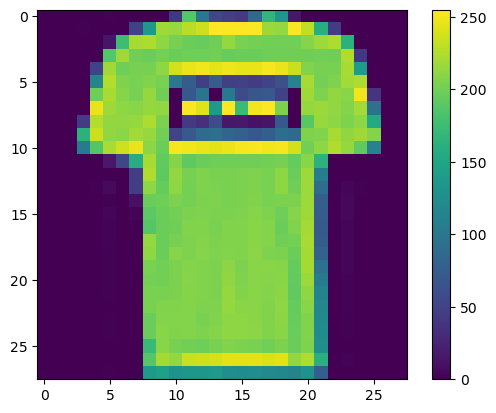

In [26]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
#valores en un rango de 0 a 1 . El set de datos debe ser pre-procesada antes de entrenar la red.
train_images = train_images / 255.0

test_images = test_images / 255.0

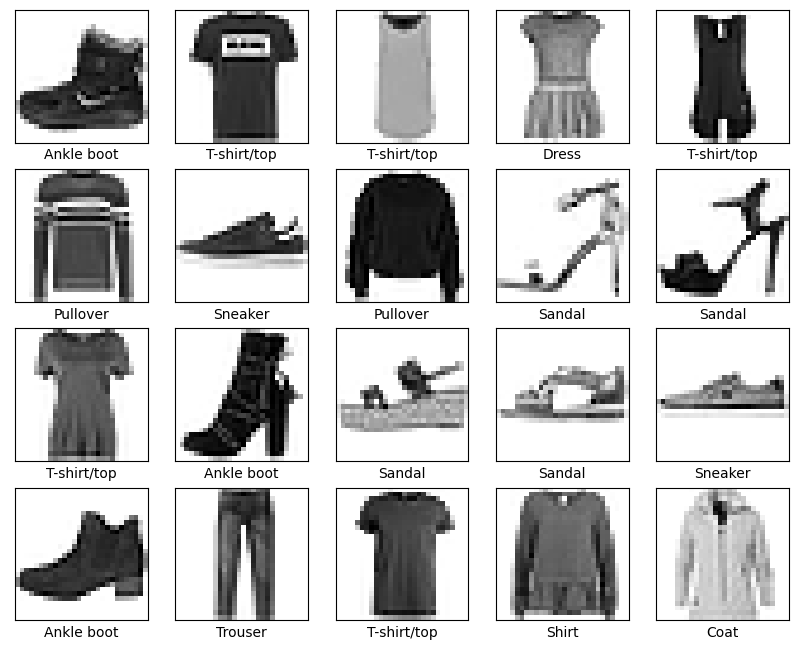

In [40]:
# verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
#Construir el modelo 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [30]:
#compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
#entrenar el modelo 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4982 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3737 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3370 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3121 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2950 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2808 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.2684 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2573 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2490 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

In [33]:
#evaluar la exactitud 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3344 - accuracy: 0.8878

Test accuracy: 0.8877999782562256


In [37]:
#hacer predicciones
predictions = model.predict(test_images)
predictions[1]

array([2.9035478e-05, 8.0003304e-15, 9.9335772e-01, 1.4495664e-09,
       6.1750668e-03, 1.4700580e-14, 4.3812842e-04, 1.9442526e-17,
       2.1547689e-10, 4.7936590e-13], dtype=float32)

In [38]:
np.argmax(predictions[1])

2

In [39]:
test_labels[1]

2

DROPOUT 

In [26]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [27]:
#Cargamos el dataframe 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# cambiamos  "target" y asignamos el nombre "label"
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [28]:
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# dborrar la etiqueta 
df.drop(['label'], axis=1, inplace=True)

In [29]:
# creando X e Y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# convertir el dataframe en un array de numpy
y = np.asarray(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [31]:
#Crear el modelo 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [32]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)               

In [33]:
#compliar el modelo 
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [34]:
#entrenamos el modelo 
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 - 0s - loss: 1.0745 - acc: 0.4889 - val_loss: 1.0256 - val_acc: 0.2333
Epoch 2/200
90/90 - 0s - loss: 0.9955 - acc: 0.5333 - val_loss: 0.9383 - val_acc: 0.6667
Epoch 3/200
90/90 - 0s - loss: 0.9075 - acc: 0.7444 - val_loss: 0.8636 - val_acc: 0.7000
Epoch 4/200
90/90 - 0s - loss: 0.8259 - acc: 0.7333 - val_loss: 0.7498 - val_acc: 0.6667
Epoch 5/200
90/90 - 0s - loss: 0.7094 - acc: 0.7889 - val_loss: 0.6086 - val_acc: 1.0000
Epoch 6/200
90/90 - 0s - loss: 0.6019 - acc: 0.9444 - val_loss: 0.4576 - val_acc: 0.9000
Epoch 7/200
90/90 - 0s - loss: 0.4983 - acc: 0.8778 - val_loss: 0.3452 - val_acc: 0.9333
Epoch 8/200
90/90 - 0s - loss: 0.3951 - acc: 0.9222 - val_loss: 0.2916 - val_acc: 0.9667
Epoch 9/200
90/90 - 0s - loss: 0.3175 - acc: 0.9444 - val_loss: 0.2230 - val_acc: 1.0000
Epoch 10/200
90/90 - 0s - loss: 0.2573 - acc: 0.9556 - val_loss: 0.1732 - val_acc: 0.9667
Epoch 11/200
90/90 - 0s - loss: 0.2534 - acc: 0.9111 - val_loss: 

Epoch 92/200
90/90 - 0s - loss: 0.1041 - acc: 0.9667 - val_loss: 0.2853 - val_acc: 0.8667
Epoch 93/200
90/90 - 0s - loss: 0.2420 - acc: 0.9111 - val_loss: 0.0374 - val_acc: 1.0000
Epoch 94/200
90/90 - 0s - loss: 0.1698 - acc: 0.9444 - val_loss: 0.1409 - val_acc: 0.9000
Epoch 95/200
90/90 - 0s - loss: 0.2417 - acc: 0.9111 - val_loss: 0.0567 - val_acc: 0.9667
Epoch 96/200
90/90 - 0s - loss: 0.1135 - acc: 0.9556 - val_loss: 0.2384 - val_acc: 0.8667
Epoch 97/200
90/90 - 0s - loss: 0.1649 - acc: 0.9222 - val_loss: 0.0515 - val_acc: 0.9667
Epoch 98/200
90/90 - 0s - loss: 0.1093 - acc: 0.9556 - val_loss: 0.0394 - val_acc: 1.0000
Epoch 99/200
90/90 - 0s - loss: 0.0969 - acc: 0.9556 - val_loss: 0.0981 - val_acc: 0.9667
Epoch 100/200
90/90 - 0s - loss: 0.0957 - acc: 0.9667 - val_loss: 0.1663 - val_acc: 0.9333
Epoch 101/200
90/90 - 0s - loss: 0.1269 - acc: 0.9444 - val_loss: 0.0528 - val_acc: 0.9667
Epoch 102/200
90/90 - 0s - loss: 0.1223 - acc: 0.9444 - val_loss: 0.0421 - val_acc: 1.0000
Epoch 1

90/90 - 0s - loss: 0.0926 - acc: 0.9667 - val_loss: 0.0350 - val_acc: 1.0000
Epoch 183/200
90/90 - 0s - loss: 0.0634 - acc: 0.9778 - val_loss: 0.1858 - val_acc: 0.9333
Epoch 184/200
90/90 - 0s - loss: 0.1535 - acc: 0.9333 - val_loss: 0.0687 - val_acc: 0.9667
Epoch 185/200
90/90 - 0s - loss: 0.0807 - acc: 0.9778 - val_loss: 0.0269 - val_acc: 1.0000
Epoch 186/200
90/90 - 0s - loss: 0.1069 - acc: 0.9444 - val_loss: 0.0275 - val_acc: 1.0000
Epoch 187/200
90/90 - 0s - loss: 0.0770 - acc: 0.9778 - val_loss: 0.0868 - val_acc: 0.9667
Epoch 188/200
90/90 - 0s - loss: 0.0849 - acc: 0.9778 - val_loss: 0.0954 - val_acc: 0.9667
Epoch 189/200
90/90 - 0s - loss: 0.0884 - acc: 0.9778 - val_loss: 0.0377 - val_acc: 1.0000
Epoch 190/200
90/90 - 0s - loss: 0.0886 - acc: 0.9444 - val_loss: 0.0397 - val_acc: 1.0000
Epoch 191/200
90/90 - 0s - loss: 0.1351 - acc: 0.9333 - val_loss: 0.0259 - val_acc: 1.0000
Epoch 192/200
90/90 - 0s - loss: 0.0756 - acc: 0.9778 - val_loss: 0.0979 - val_acc: 0.9667
Epoch 193/200

In [35]:
# Evaluamos el modelo 
model.evaluate(X_test, y_test, verbose=2)

[0.00785722304135561, 1.0]

In [36]:
#cargar las  librerias para la regularización 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [37]:
#crear el modelo regularizdor
def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [38]:
model = create_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

In [39]:
# compliar el modelo
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
#entrenar de nuevo el modelo
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 - 0s - loss: 1.2361 - acc: 0.4111 - val_loss: 1.1060 - val_acc: 0.0000e+00
Epoch 2/200
90/90 - 0s - loss: 1.1296 - acc: 0.3444 - val_loss: 1.1127 - val_acc: 0.2333
Epoch 3/200
90/90 - 0s - loss: 1.0705 - acc: 0.4222 - val_loss: 1.1210 - val_acc: 0.2333
Epoch 4/200
90/90 - 0s - loss: 1.1496 - acc: 0.3778 - val_loss: 1.1211 - val_acc: 0.2333
Epoch 5/200
90/90 - 0s - loss: 1.0899 - acc: 0.4000 - val_loss: 1.1158 - val_acc: 0.2333
Epoch 6/200
90/90 - 0s - loss: 1.1457 - acc: 0.3333 - val_loss: 1.1092 - val_acc: 0.2333
Epoch 7/200
90/90 - 0s - loss: 1.1563 - acc: 0.3222 - val_loss: 1.1007 - val_acc: 0.2333
Epoch 8/200
90/90 - 0s - loss: 1.1187 - acc: 0.4111 - val_loss: 1.0959 - val_acc: 0.2333
Epoch 9/200
90/90 - 0s - loss: 1.1114 - acc: 0.3889 - val_loss: 1.0911 - val_acc: 0.3667
Epoch 10/200
90/90 - 0s - loss: 1.0865 - acc: 0.3778 - val_loss: 1.0857 - val_acc: 0.5000
Epoch 11/200
90/90 - 0s - loss: 1.1587 - acc: 0.3556 - val_lo

Epoch 92/200
90/90 - 0s - loss: 0.4476 - acc: 0.7667 - val_loss: 0.3446 - val_acc: 1.0000
Epoch 93/200
90/90 - 0s - loss: 0.4562 - acc: 0.7444 - val_loss: 0.3388 - val_acc: 0.9667
Epoch 94/200
90/90 - 0s - loss: 0.4917 - acc: 0.8000 - val_loss: 0.3393 - val_acc: 1.0000
Epoch 95/200
90/90 - 0s - loss: 0.4848 - acc: 0.7444 - val_loss: 0.3447 - val_acc: 1.0000
Epoch 96/200
90/90 - 0s - loss: 0.4895 - acc: 0.7556 - val_loss: 0.3556 - val_acc: 0.9000
Epoch 97/200
90/90 - 0s - loss: 0.4871 - acc: 0.7667 - val_loss: 0.3673 - val_acc: 0.7000
Epoch 98/200
90/90 - 0s - loss: 0.5057 - acc: 0.7778 - val_loss: 0.3700 - val_acc: 0.7000
Epoch 99/200
90/90 - 0s - loss: 0.4964 - acc: 0.6889 - val_loss: 0.3643 - val_acc: 0.7667
Epoch 100/200
90/90 - 0s - loss: 0.4374 - acc: 0.7889 - val_loss: 0.3529 - val_acc: 0.8333
Epoch 101/200
90/90 - 0s - loss: 0.4562 - acc: 0.8556 - val_loss: 0.3378 - val_acc: 0.9667
Epoch 102/200
90/90 - 0s - loss: 0.4928 - acc: 0.7222 - val_loss: 0.3363 - val_acc: 0.9667
Epoch 1

Epoch 183/200
90/90 - 0s - loss: 0.2040 - acc: 0.9556 - val_loss: 0.0697 - val_acc: 0.9667
Epoch 184/200
90/90 - 0s - loss: 0.2066 - acc: 0.9000 - val_loss: 0.0762 - val_acc: 0.9667
Epoch 185/200
90/90 - 0s - loss: 0.1921 - acc: 0.9222 - val_loss: 0.1026 - val_acc: 0.9667
Epoch 186/200
90/90 - 0s - loss: 0.1415 - acc: 0.9556 - val_loss: 0.1175 - val_acc: 0.9667
Epoch 187/200
90/90 - 0s - loss: 0.1449 - acc: 0.9222 - val_loss: 0.0911 - val_acc: 0.9667
Epoch 188/200
90/90 - 0s - loss: 0.1284 - acc: 0.9556 - val_loss: 0.0659 - val_acc: 0.9667
Epoch 189/200
90/90 - 0s - loss: 0.2457 - acc: 0.9556 - val_loss: 0.0661 - val_acc: 0.9667
Epoch 190/200
90/90 - 0s - loss: 0.1172 - acc: 0.9556 - val_loss: 0.0781 - val_acc: 0.9667
Epoch 191/200
90/90 - 0s - loss: 0.1324 - acc: 0.9556 - val_loss: 0.1087 - val_acc: 0.9667
Epoch 192/200
90/90 - 0s - loss: 0.2093 - acc: 0.9000 - val_loss: 0.0782 - val_acc: 0.9667
Epoch 193/200
90/90 - 0s - loss: 0.1809 - acc: 0.9222 - val_loss: 0.0441 - val_acc: 1.0000

In [40]:
#evaluar el modelo
model.evaluate(X_test, y_test, verbose=2)

[0.03406968712806702, 1.0]